In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# **1. Data preprocessing **

In [ ]:
df = pd.read_csv('Netflix_Userbase.csv')
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


# **2. Handle missing values**

In [ ]:

missing_values = df.isnull().sum()
print(missing_values)

for column in df.columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        df[column].fillna(df[column].mean(), inplace=True)

# Impute missing values with the mode for categorical columns
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)

missing_values = df.isnull().sum()
print(missing_values)


User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64
User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64


# **3. Encode caterogical Varaibles**

In [ ]:
df = df.drop(columns=['Country', 'Device'])

#linear regression
df['Join Date'] = pd.to_datetime(df['Join Date'])
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])
df['Days_Since_Join'] = (df['Last Payment Date'] - df['Join Date']).dt.days
df.drop(['Join Date', 'Last Payment Date'], axis=1, inplace=True)


In [ ]:

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Plan Duration'] = df['Plan Duration'].map({'1 Month': 1, '0 month': 0})
df['Subscription Type'] = df['Subscription Type'].map({'Basic': 2, 'Standard': 1, 'Premium': 0})

#to create feedback
df['Engagement_Score'] = df['Monthly Revenue'] + df['Subscription Type']
feed = df['Engagement_Score'].quantile(0.50)
df['Feedback'] = (df['Engagement_Score'] >= feed).astype(int)
df_dumies = pd.get_dummies(df, drop_first=True)
df_dumies['Feedback'] =  (df['Feedback']>0).astype(int)
df_dumies


,User ID,Subscription Type,Monthly Revenue,Age,Gender,Plan Duration,Days_Since_Join,Engagement_Score,Feedback
0,1,2,10,28,1,1,629,12,0
1,2,0,15,35,0,1,774,15,1
2,3,1,12,42,1,1,119,13,0
3,4,1,12,51,0,1,262,13,0
4,5,2,10,33,1,1,174,12,0
...,...,...,...,...,...,...,...,...,...
2495,2496,0,14,28,0,1,500,14,1
2496,2497,2,15,33,0,1,462,17,1
2497,2498,1,12,38,1,1,310,13,0
2498,2499,1,13,48,0,1,364,14,1


# **4. Feature selection**

In [ ]:
#linear
X1 = df[['Engagement_Score', 'Feedback', 'Days_Since_Join']]
Y1 = df['Monthly Revenue']

In [ ]:
#logistic
X = df_dumies.drop([ 'Feedback', 'Age', 'Gender', 'Plan Duration', 'User ID' ], axis=1)
Y = df_dumies['Feedback']

#I choose to drop certain columns because it does not have a significant value to the prediction by doing that i can maximize the accuaracy of my prediction

# **Part 2 (EDA)**

In [ ]:
numeric_summary = df.describe()

numeric_summary

,User ID,Subscription Type,Monthly Revenue,Age,Gender,Plan Duration,Days_Since_Join,Engagement_Score,Feedback
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.0,2500.000000,2500.00000,2500.00000
mean,1250.50000,1.106400,12.508400,38.795600,0.497200,1.0,326.102000,13.61480,0.52120
std,721.83216,0.825683,1.686851,7.171778,0.500092,0.0,118.638034,1.85941,0.49965
min,1.00000,0.000000,10.000000,26.000000,0.000000,1.0,-159.000000,10.00000,0.00000
25%,625.75000,0.000000,11.000000,32.000000,0.000000,1.0,247.000000,12.00000,0.00000
50%,1250.50000,1.000000,12.000000,39.000000,0.000000,1.0,331.000000,14.00000,1.00000
75%,1875.25000,2.000000,14.000000,45.000000,1.000000,1.0,401.250000,15.00000,1.00000
max,2500.00000,2.000000,15.000000,51.000000,1.000000,1.0,776.000000,17.00000,1.00000


# **Visualization**

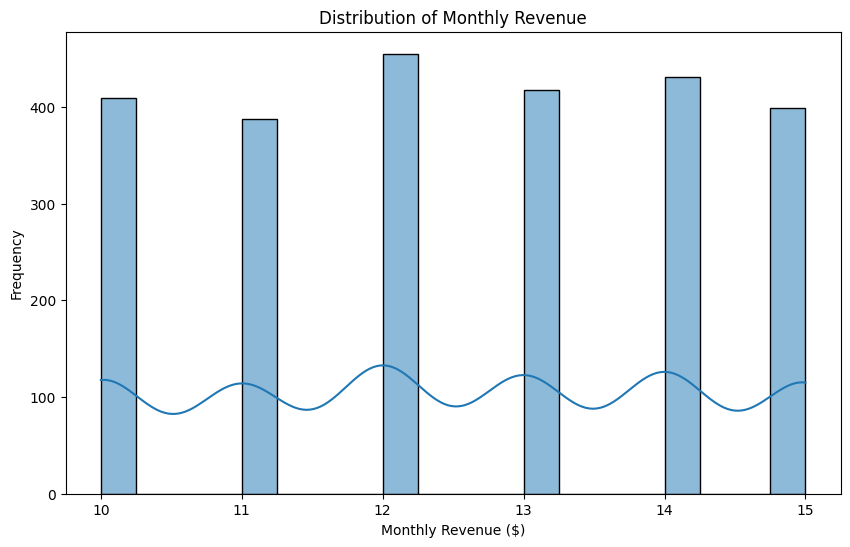

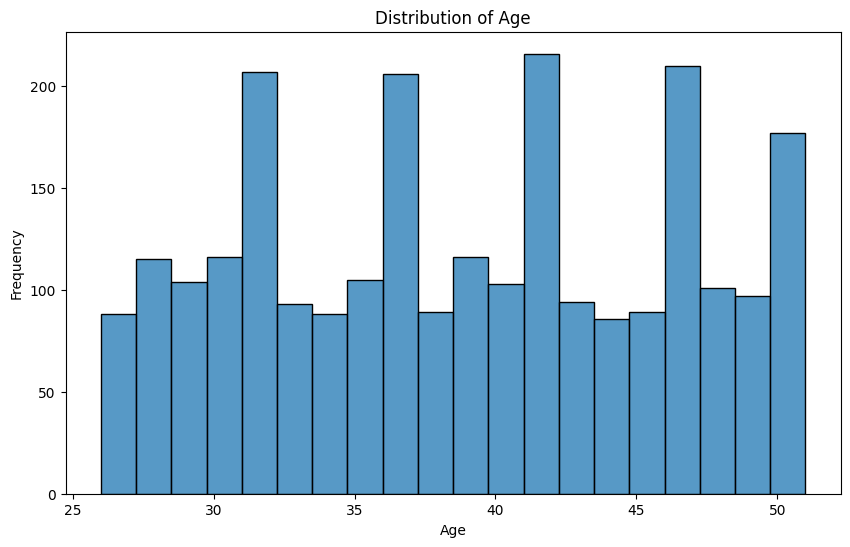

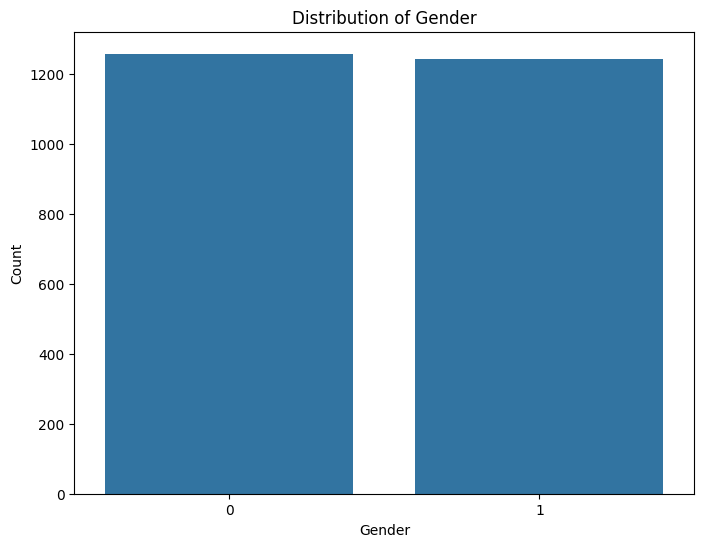

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Monthly Revenue
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Monthly Revenue', bins=20, kde=True)
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue ($)')
plt.ylabel('Frequency')
plt.show()

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


# **Part 3 Linear Regression Model**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

# **Model Evaluation**

In [ ]:
# Evaluate the model
feature_values = {'Engagement_Score': [17], 'Feedback': [1], 'Days_Since_Join': [365]}
feature_df = pd.DataFrame(feature_values)
predicted_revenue = model.predict(feature_df)
print("Predicted Monthly Revenue:", predicted_revenue[0])

Ylin_pred = model.predict(X_test)
r_squared = r2_score(Y_test, Ylin_pred)
rmse = mean_squared_error(Y_test, Ylin_pred, squared=False)

print("R-squared:", r_squared)
print("Root Mean Squared Error (RMSE):", rmse)

Predicted Monthly Revenue: 15.095804502370225
R-squared: 0.8123833677068518
Root Mean Squared Error (RMSE): 0.7198794389259309


# **Part 4 Logistic Regression (predicting customer feedback)**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state=42 )

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model2 = LogisticRegression()
model2.fit(X_train_scaled, Y_train)

LogisticRegression()

# **Model Prediction**

In [ ]:
Y_pred = model2.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix: ")
print(conf_matrix)
print("Classification Report: ")
print(class_report)

Accuracy: 1.0
Confusion Matrix: 
[[251   0]
 [  0 249]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       251
           1       1.00      1.00      1.00       249

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

